#### Compute bootstrap CIs for fractal dimension power law fits (ABM simulations)
- **Author:** Dhananjay Bhaskar
- **Last Modified:** 1 Jul 2019

In [2]:
library(repr)
library(boot)
library(MASS)
library(RcppCNPy)
library(R.matlab)
library(reticulate)

In [3]:
ydata = npyLoad("ABM_Spanning_RGy.npy")
xdata = npyLoad("ABM_Spanning_CS.npy", "integer")

In [4]:
str(xdata)

 int [1:14598] 11 11 10 9 8 4 5 11 11 10 ...


In [5]:
plaw = function(x,a,b){a*x^(b)}

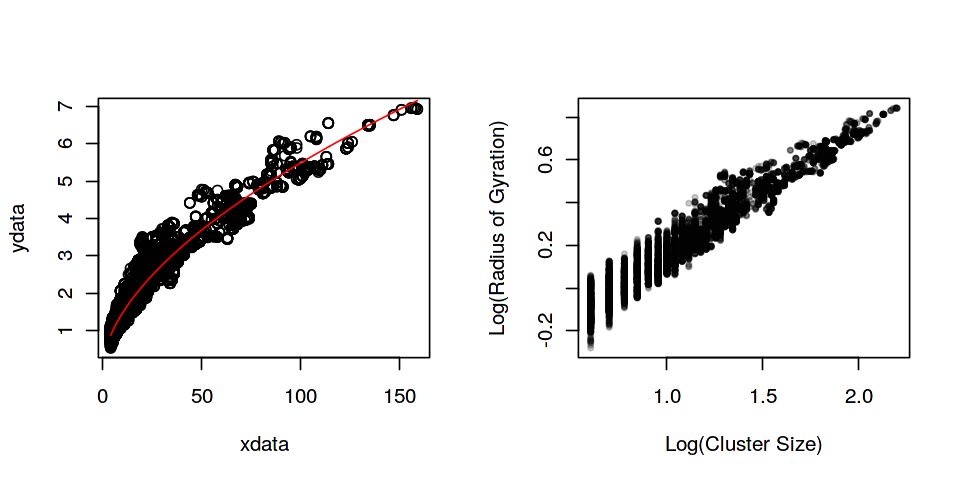

In [6]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow=c(1,2))

plot(xdata, ydata)
curve(plaw(x, 0.3903, 0.5741), add=TRUE, col="red")

plot(log10(xdata), log10(ydata), type="p", xlab="Log(Cluster Size)", ylab="Log(Radius of Gyration)", 
    cex=0.5, pch=21, col=rgb(0,0,0,alpha=0.2), bg=rgb(0,0,0,alpha=0.2))

#### R Non-linear Least Squares Fit

In [7]:
fit = nls(ydata~plaw(xdata,a,b),start=list(a=0.3,b=0.57))
print(fit)

Nonlinear regression model
  model: ydata ~ plaw(xdata, a, b)
   data: parent.frame()
     a      b 
0.3903 0.5741 
 residual sum-of-squares: 849.7

Number of iterations to convergence: 3 
Achieved convergence tolerance: 4.239e-06


In [8]:
print(names(fit))
sum(residuals(fit)^2)
a = coef(fit)[1]
b = coef(fit)[2]
print(c(a,b))

[1] "m"           "convInfo"    "data"        "call"        "dataClasses"
[6] "control"    


[1] 849.7388

        a         b 
0.3902550 0.5741333 


#### Compute R Bootstrap Confidence Intervals for Regression Parameters

In [9]:
Cdata = cbind(xdata,ydata)
print(dim(Cdata))

[1] 14598     2


In [10]:
bs = function(data, indices) {
    ds = data[indices,]
    xs = ds[,1]
    ys = ds[,2]
    fit = nls(ys~plaw(xs,a,b),start=list(a=0.3,b=0.57))
    SSR = sum(residuals(fit)^2)
    a = coef(fit)[1]
    b = coef(fit)[2]
    return(c(a,b))
} 

In [11]:
results = boot(data=Cdata, statistic=bs, R=5000)

In [12]:
print(results)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Cdata, statistic = bs, R = 5000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.3902550 -6.011342e-06 0.001305990
t2* 0.5741333 -2.751228e-06 0.001023134


In [13]:
avec = results$t[,1]
bvec = results$t[,2]

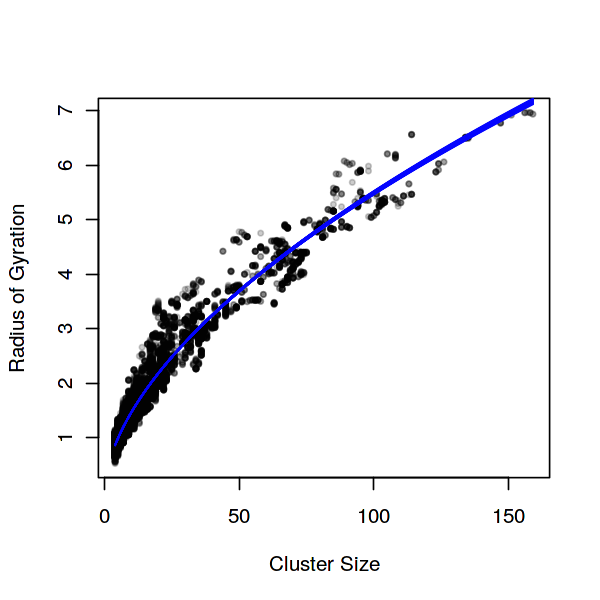

In [14]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(xdata, ydata, type="p", xlab="Cluster Size", ylab="Radius of Gyration", 
     cex=0.5, pch=21, col=rgb(0,0,0,alpha=0.2), bg=rgb(0,0,0,alpha=0.2))
for (i in seq(1, length(avec))){
    curve(plaw(x, avec[i], bvec[i]), add = TRUE, col = rgb(0,0,1,alpha=0.1))
}

In [15]:
writeMat("Sim_boot.mat", a = avec, b = bvec)

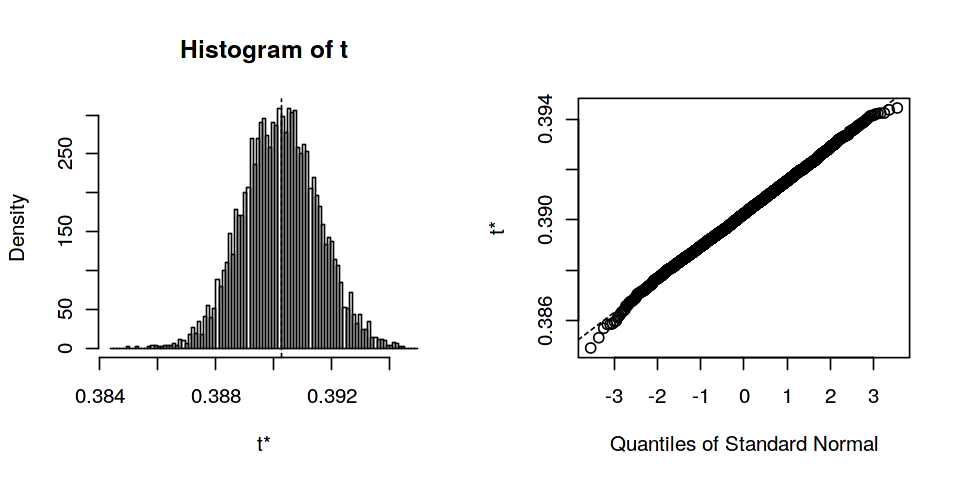

In [16]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot(results,index=1)

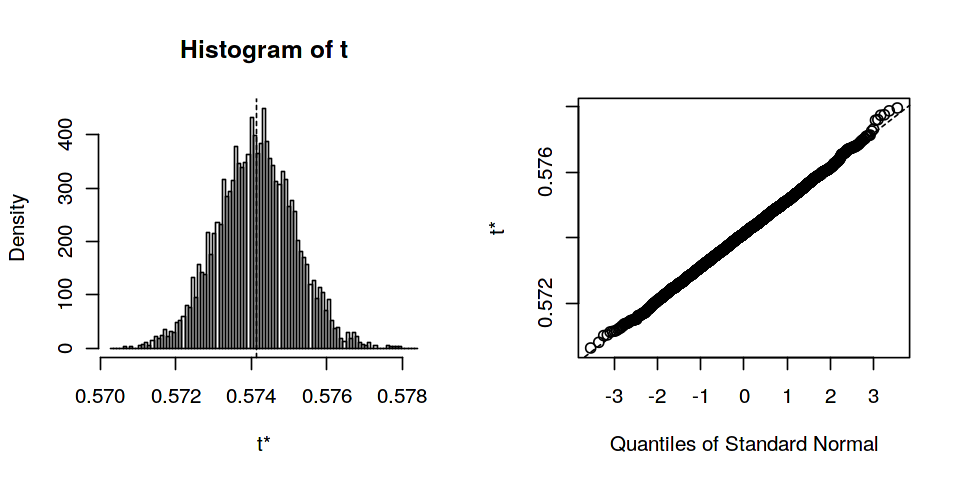

In [17]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot(results,index=2)